**Objective**

From the data that describe the houses in towns in Boston, the aim is to generate a linear regression that allows us to predict the average value of a home in the same city.

-------------------
##**Data Information:**
-------------------
Each record describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.



Attribute information (in order):


- **crime_rate:** crime rate per capita by city
- **prop_zoned:** proportion of zoned residential land for lots larger than 25,000 square feet.
- **prop_non_retail_acres:** proportion of commercial non-retail acres per city
- **river_charles:** Charles River dummy variable (= 1 if the reach borders the river; 0 otherwise)
- **concentration_nox:** concentration of nitric oxides (parts per 10 million)
- **avg_rooms:** average number of rooms per dwelling
- **age:** proportion of owner-occupied units built before 1940
- **dist_employment_centres:** weighted distances to five Boston employment centers
- **ind_acces_highway:** index of accessibility to radial roads
- **tax:** full value property tax rate per $10,000
- **prop_teacher_student:** student-teacher ratio by location
- **percent_status:** %lower status of the population
- **median_value_occupied_homes:** median value of owner-occupied homes in 1000 dollars 

Importing libraries 

In [5]:
# Reading files
from google.colab import files

# Data manipulation 
import numpy as np
import pandas as pd

# Empty values imputation 
from sklearn.impute import KNNImputer

# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#  Linear regression 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data scaling 
from sklearn.preprocessing import MinMaxScaler

# Ignoring **warnings** 
import warnings
warnings.filterwarnings("ignore")

Loading the data and reading it to a dataframe 

In [7]:
# Uploading data to google collab
uploading_data = files.upload()

Saving data_Boston.csv to data_Boston.csv


In [9]:
datos = pd.read_csv("data_Boston.csv")

Data review 

In [10]:
datos.head()

,crime_rate,prop_zoned,prop_non_retail_acres,river_charles,concentration_nox,avg_rooms,age,dist_employment_centres,ind_acces_highway,tax,prop_teacher_student,percent_status,median_value_occupied_homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [11]:
# Data information:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   crime_rate                   506 non-null    float64
 1   prop_zoned                   506 non-null    float64
 2   prop_non_retail_acres        506 non-null    float64
 3   river_charles                506 non-null    int64  
 4   concentration_nox            506 non-null    float64
 5   avg_rooms                    506 non-null    float64
 6   age                          506 non-null    float64
 7   dist_employment_centres      506 non-null    float64
 8   ind_acces_highway            506 non-null    int64  
 9   tax                          506 non-null    int64  
 10  prop_teacher_student         506 non-null    float64
 11  percent_status               506 non-null    float64
 12  median_value_occupied_homes  506 non-null    float64
dtypes: float64(10), int6

From the data set: there are 13 columns with data (including the response variable) and a total of 506 rows, with no missing values.
- The variable "river_charles" is a dummy variable: its values ​​are 0 or 1
- The other 11 variables are numerical  

## Univariate and bivariate analysis

**Univariate analysis**

Bar plot of the categorical variable "river_charles" 

<Axes: xlabel='river_charles', ylabel='count'>

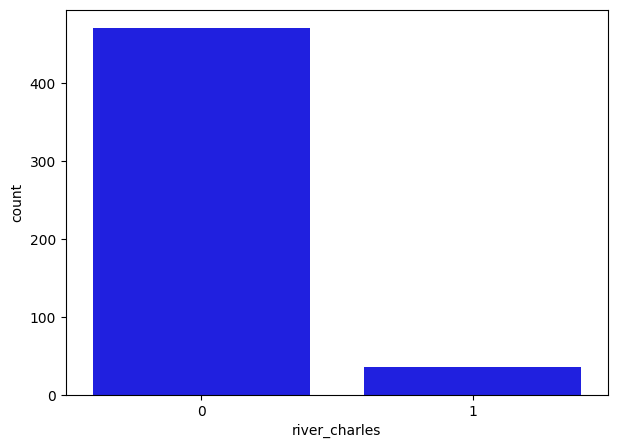

In [12]:
# Bar plot of "river_charles"
figure, axis = plt.subplots(figsize=(7, 5))
sns.countplot(x = "river_charles", data = datos, color = "blue", order = datos["river_charles"].value_counts().index)

From the plot: most residences in the data set are far from the Charles River. 

Now, the distribution of the numerical columns 

In [14]:
#We first create a list with the names of the columns of the data set, eliminating the dummy variable of "river_charles"
numeric_columns = list(datos.columns)
del numeric_columns[3]

crime_rate


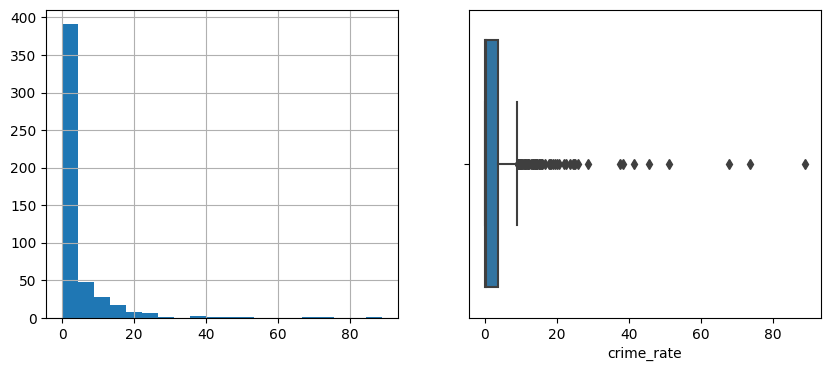

prop_zoned


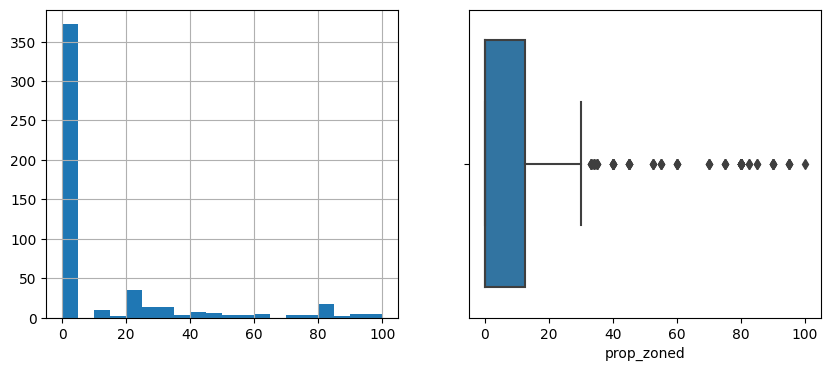

prop_non_retail_acres


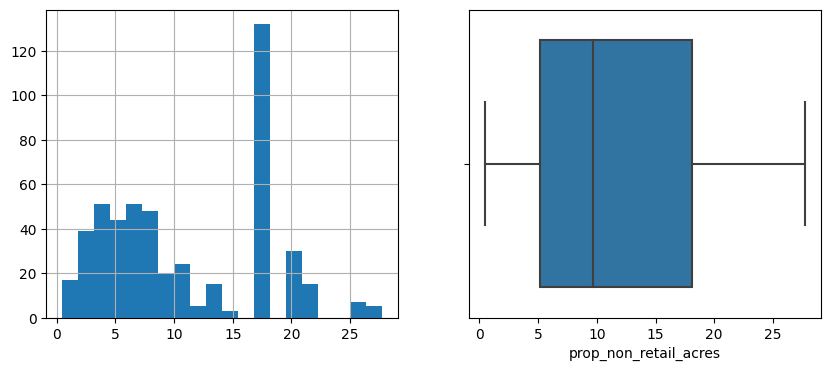

concentration_nox


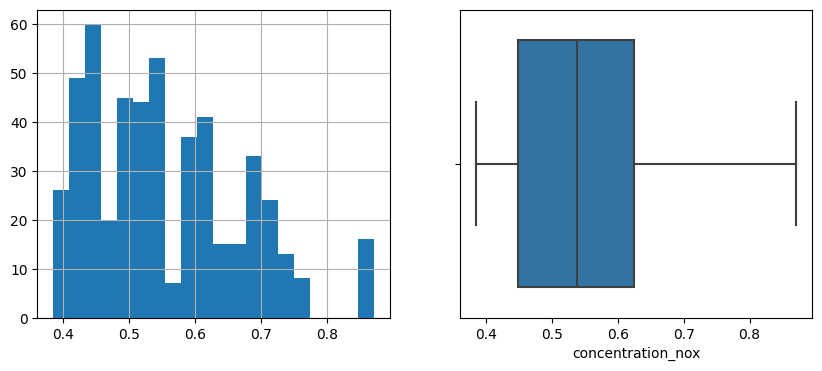

avg_rooms


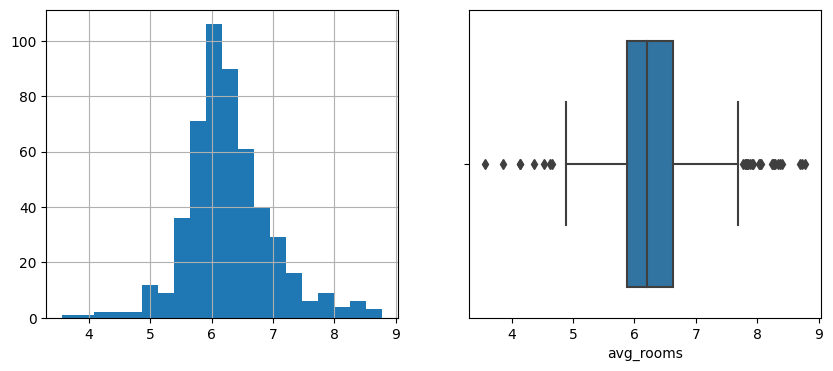

age


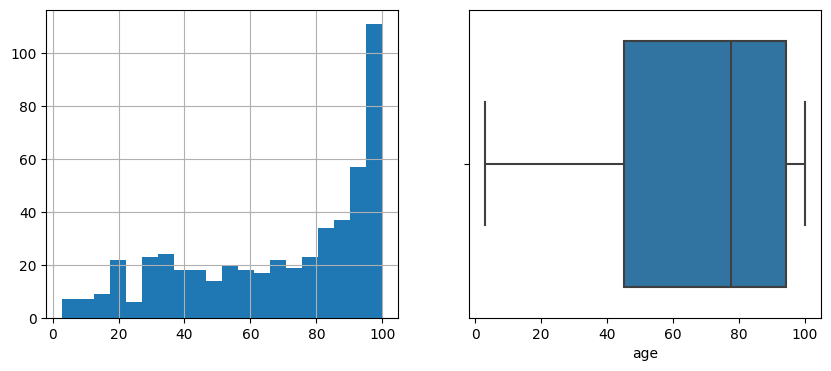

dist_employment_centres


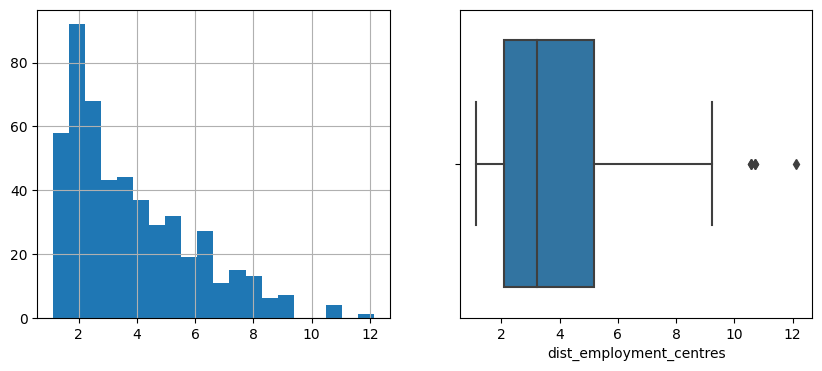

ind_acces_highway


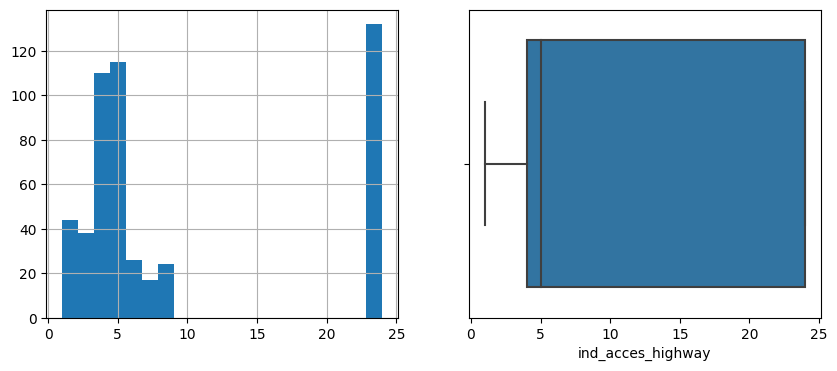

tax


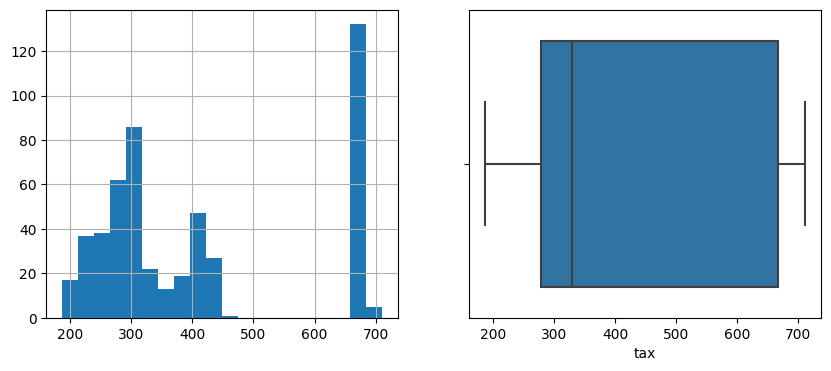

prop_teacher_student


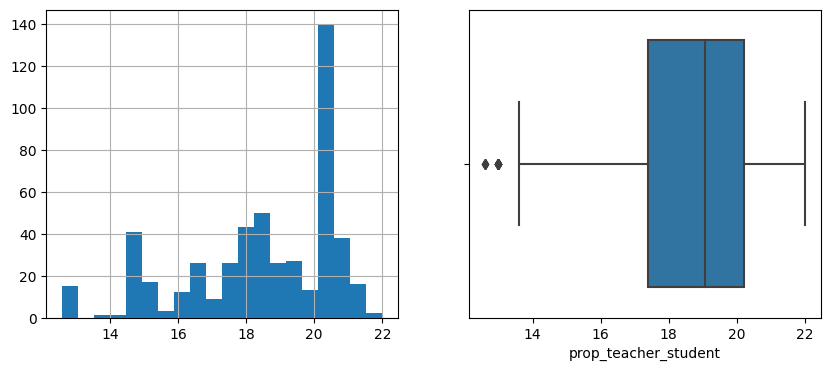

percent_status


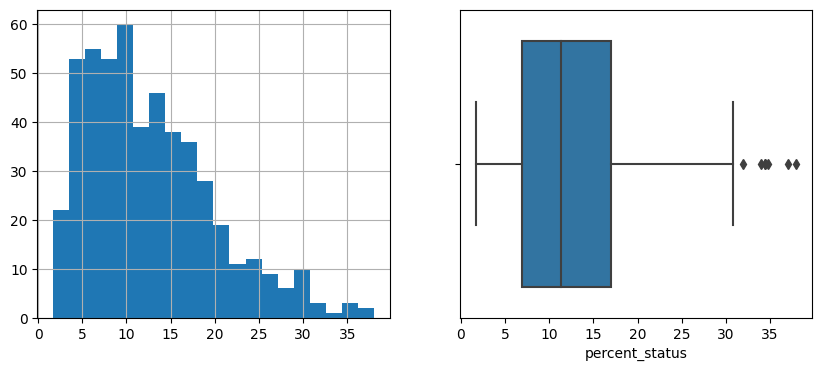

median_value_occupied_homes


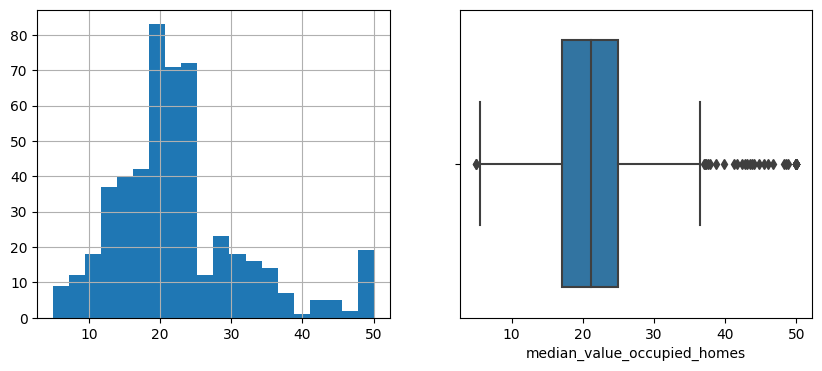

In [16]:
# Printing the distributions and boxplots of the variables 
for i in numeric_columns:
  print(i)
  plt.figure(figsize=(10,4))
  
  plt.subplot(1,2,1)
  datos[i].hist(bins = 20)
  
  plt.subplot(1,2,2)
  sns.boxplot(x = datos[i])
  
  plt.show()

**Observations:**


* The variables "crime" and "prop_zoned" are positively skewed: This suggests that most areas have low crime rates, and most residential lots are below the 25,000 square foot area.

* Variable "age" distribution suggests many of the houses in the area were built before 1940.


* The variable "dist_employment_centres" has a near-exponential distribution, indicating that most houses are closer to these employment centers.


* The variables "tax" and "ind_acces_highway" have a bimodal distribution, which indicates that the tax rate is possibly higher for some properties that have a high index of accessibility to radial highways.


* The dependent variable is skewed to the right.

**Bivariate analysis** 

Plotting a correlations *heatmap* to visualize whether or not they exist between the different variables 

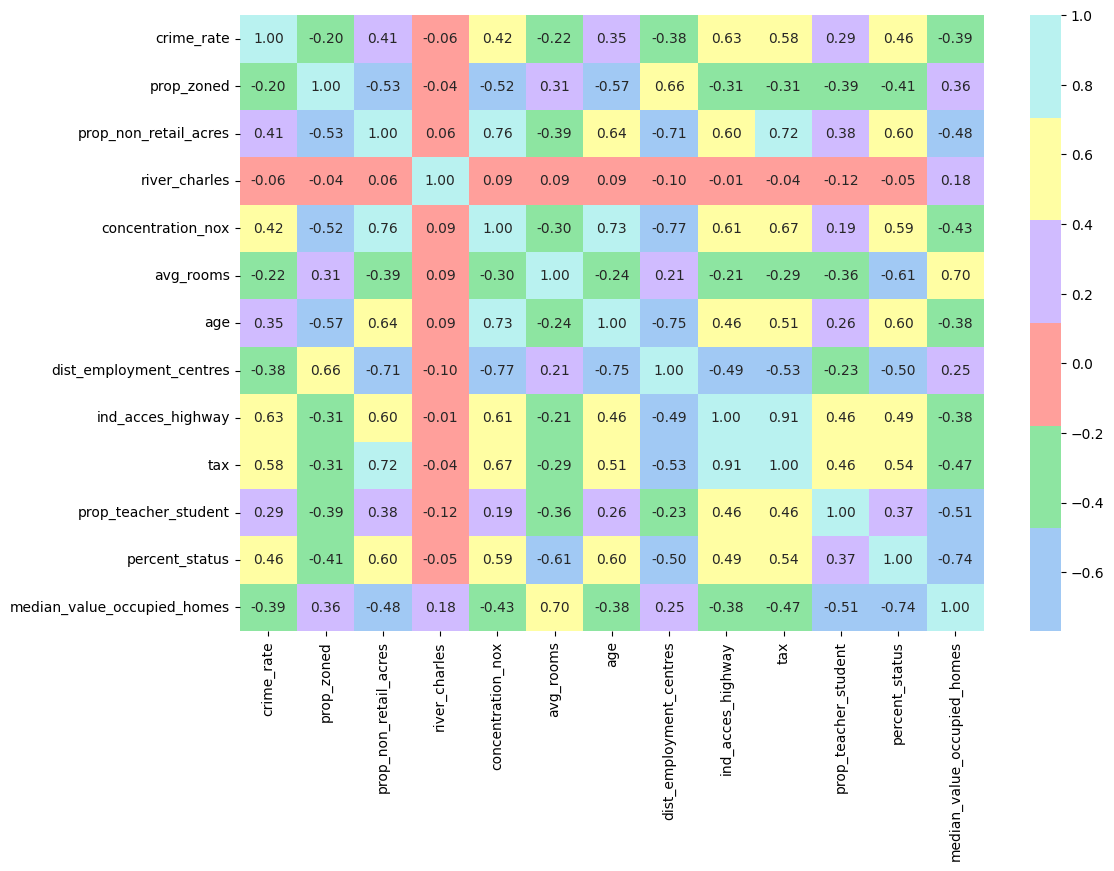

In [17]:
plt.figure(figsize=(12,8))
#heatmap = sns.diverging_palette(230, 20, as_cmap = True)
color = sns.color_palette("pastel6")
sns.heatmap(datos.corr(), annot = True, fmt = '.2f', cmap = color)
plt.show()

**Observations:**



1. The variable "crime_rate" is positively correlated with: 


* The proportion of commercial non-retail acres (prop_non_retail_acres)
, the concentration of nitric oxides (concentration_nox), owner-occupied units built before 1940 (age), highway accessibility index (ind_acces_highway), with "taxes", percentage low status of the population (percent_status ). 

* This means a higher crime rate in areas near highways with a higher concentration of nitric oxide and where the houses are older (built before 1940).

* On the other hand, it is negatively correlated with the proportion of residential land zoned to lots (prop_zoned) and the average number of rooms (avg_rooms): this indicates that there is less crime per capita as residential areas with lots increase, as well as a higher number of rooms, that is, areas in residential development with stability and where the houses are large. 



2. The ZN variable is negatively correlated with:

* The proportion of non-retail commercial acres (prop_non_retail_acres), the concentration of nitric oxides (concentration_nox), the proportion of occupied units built before 1940 (age), the index of accessibility to highways (ind_access_highway), the "tax", the student-teacher ratio (prop_teacher_student) and the lower status percentage of the population (percent_status).

* These correlations make sense since this variable represents large residential areas, so it can be expected that these are located on the city's periphery, making them less accessible to radial roads and non-retail industries. Furthermore, this correlates with a lower concentration of nitric oxides and fewer pre-1940 houses. This also indicates a lower student-teacher ratio and a lower property tax rate.

* The variable is positively related to the average number of rooms per dwelling (avg_rooms), the weighted distance to five Boston employment centers (dist_employment_centres), and the median value of occupied places (dependent variable). Again, these relationships between the variables make sense since occupied homes have a higher median value on these large residential lots; it makes sense that they have more bedrooms and, due to the location, are further away from employment centers.



3. The variable "prop_non_retail_acres" is positively correlated with:

* The concentration of nitric oxides (concentration_nox), the proportion of occupied units built before 1940 (age), the accessibility to highways (ind_acces_highway), the "tax", the ratio of students per teacher (prop_maetro_alumnp), the percentage of the population of a lower status (percent_status) and the crime rate (crime_rate).

* This makes sense since in areas with non-retail businesses, there may be a greater presence of industries, increasing the concentration of nitric oxide. On the other hand, the number of occupied houses built before 1940, close to radial highways, where taxes are high, increases.

* When the "prop_non_retail_acres" variable increases, it relates to houses having fewer rooms and being closer to workplaces. It also indicates that occupied homes will have a lower average value.


4. The increase in the "concentration_nox" variable predicts the growth in homes built before 1940 that are closer to highways and have a higher tax rate. It also indicates a higher percentage of the population that belongs to a lower status and is related to houses with fewer rooms and a lower average value for homes.

Calling the method for calculating the correlation between the two variables plotted 

In [18]:
from scipy.stats import pearsonr

Plots between variables with the highest correlation according to the previous *heatmap*  

In [19]:
# Scatterplot function between two variables 

def scatter_function(var1, var2, set_datos):
  plt.figure(figsize=(6, 6))
  sns.scatterplot(x = var1 , y = var2, data = set_datos)
  plt.show()

### "crime_rate" variable 

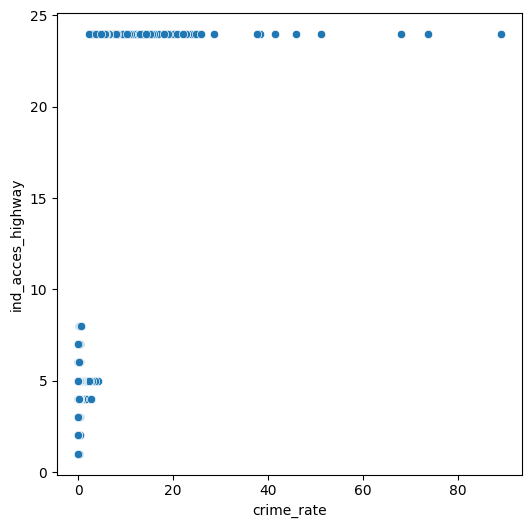

0.6255051452626023

In [20]:
# Variables: "crime_rate", "ind_acces_highway" 
scatter_function("crime_rate", "ind_acces_highway", datos)
pearsonr(datos["crime_rate"], datos["ind_acces_highway"])[0]

There is no relationship between these two variables.

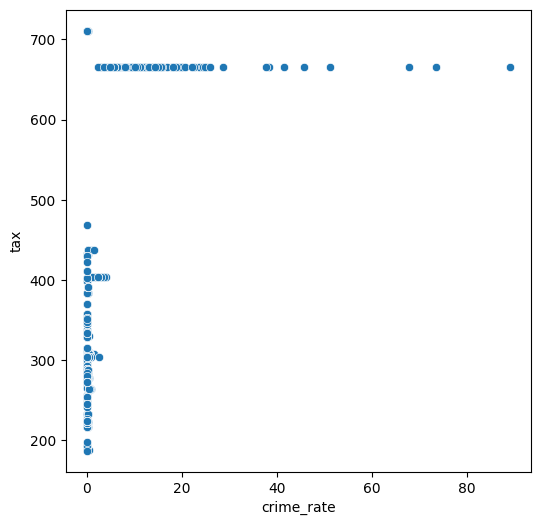

0.5827643120325852

In [21]:
# Variables: "crime_rate", "tax" 
scatter_function("crime_rate", "tax", datos)
pearsonr(datos["crime_rate"], datos["tax"])[0]

There is not a clear relationship between the crime_rate and the tax variables, since for a crime rate of 0, there is a considerable variation of the tax variable, and for a high tax there is a significant variance in crime rates.

### Variable "prop_zoned" 

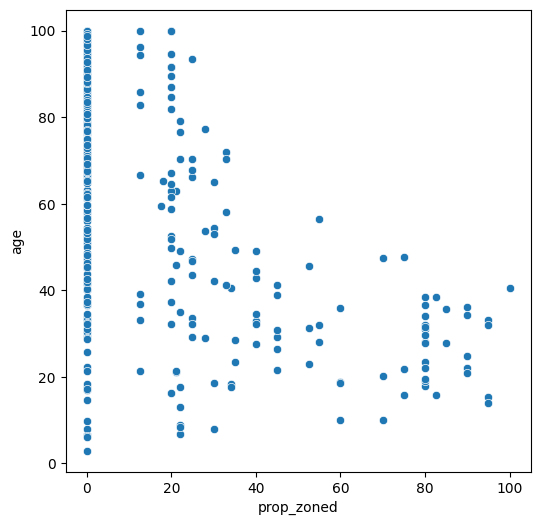

-0.5695373420992116

In [22]:
# Variables: "prop_zoned", "age" 
scatter_function("prop_zoned", "age", datos)
pearsonr(datos["prop_zoned"], datos["age"])[0]

There isn't a relationship between these variables: "age" and "prop_zoned", since the values are very scattered from each other from the point where "porp_zonif" exceeds the value of zero. But, on the other hand, when its value is precisely zero, there are points for practically the whole age range of the dwellings. 

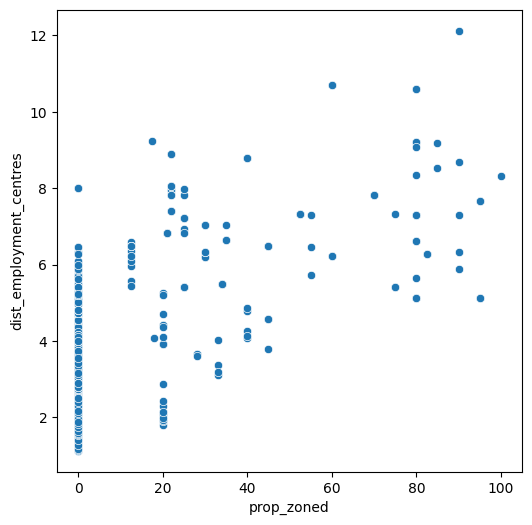

0.6644082227621102

In [23]:
# Variables: "prop_zoned", "dist_employment_centres" 
scatter_function("prop_zoned", "dist_employment_centres", datos)
pearsonr(datos["prop_zoned"], datos["dist_employment_centres"])[0]

Given the degree of dispersion of the data, there is no relationship between "prop_zoned" and "dist_employment_centres". The only appreciable thing is a growing trend of "dist_employment_centres" from the point at which "prop_zoned" exceeds the value of zero. 

### Variable "prop_non_retail_acres"

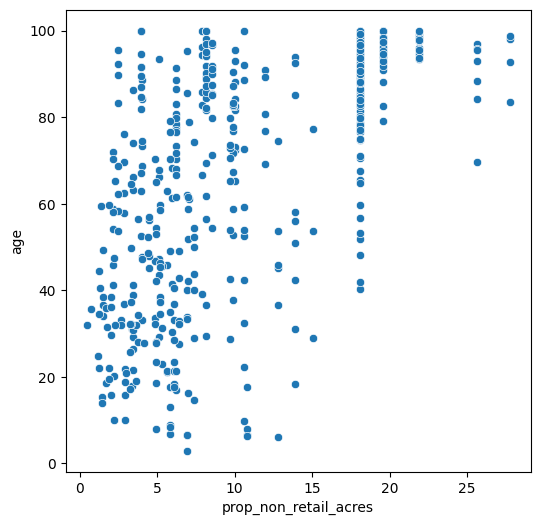

0.6447785113552555

In [24]:
# Variables: "prop_non_retail_acres", "age" 
scatter_function("prop_non_retail_acres", "age", datos)
pearsonr(datos["prop_non_retail_acres"], datos["age"])[0]

Between the variables "age" and "prop_non_retail_acres", it is impossible to establish a relationship from what is observed in the graph. 

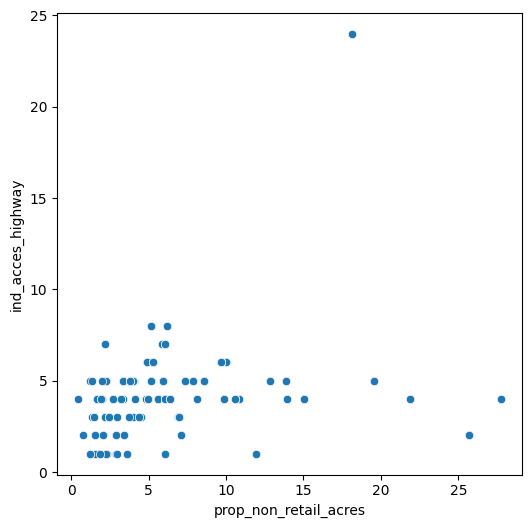

0.5951292746038483

In [25]:
# Variables: "prop_non_retail_acres", "ind_acces_highway" 
scatter_function("prop_non_retail_acres", "ind_acces_highway", datos)
pearsonr(datos["prop_non_retail_acres"], datos["ind_acces_highway"])[0]

Between these two variables, "prop_acces_non_retail" and "ind_acces_highway", no linear relationship is observed; the correlation coefficient may be due to the extreme points in the variables. 

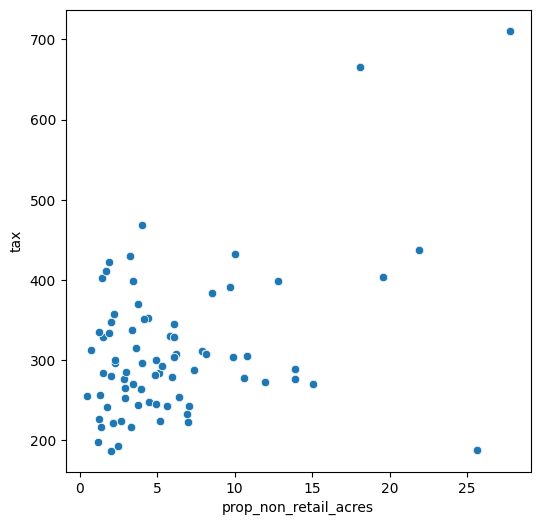

0.720760179951542

In [26]:
# Variables: "prop_non_retail_acres", "tax" 
scatter_function("prop_non_retail_acres", "tax", datos)
pearsonr(datos["prop_non_retail_acres"], datos["tax"])[0]

In this plot of "tax" against "prop_non_retail_acres", there is no relationship observed, and as in the previous case, the correlation coefficient may be due to extreme values for high values ​​of both features. 

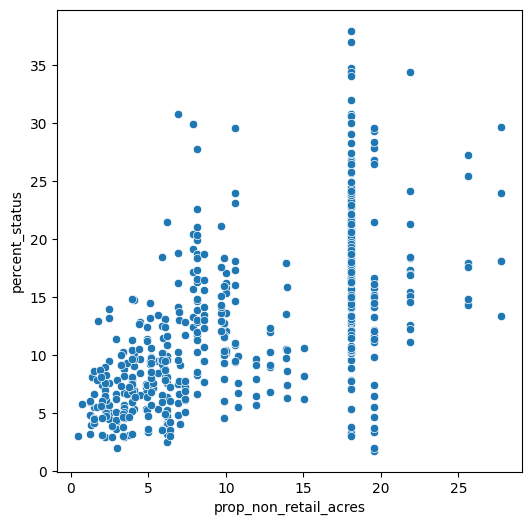

0.6037997164766215

In [27]:
# Variables: "prop_non_retail_acres", "percent_status" 
scatter_function("prop_non_retail_acres", "percent_status", datos)
pearsonr(datos["prop_non_retail_acres"], datos["percent_status"])[0]

Plotting percent_status against prop_non_retail_acres does not identify a relationship between the two since the points are sparse. However, for specific values ​​of "prop_non_retail_acres", the full range of values ​​of the other variable appears to be covered. 

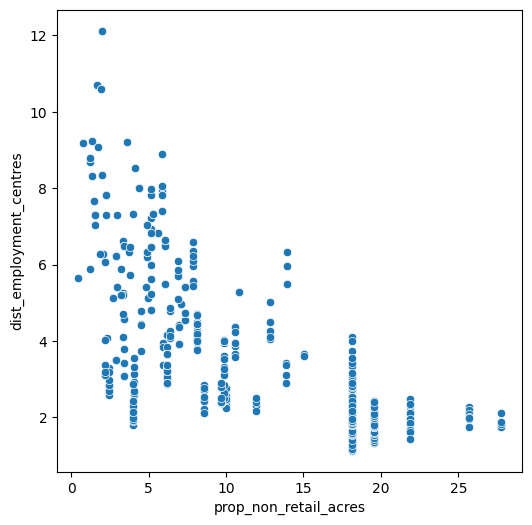

-0.7080269887427679

In [28]:
# Variables: "prop_non_retail_acres", "dist_employment_centres" 
scatter_function("prop_non_retail_acres", "dist_employment_centres", datos)
pearsonr(datos["prop_non_retail_acres"], datos["dist_employment_centres"])[0]

The correlation between "pro_acres_non_retail" and "dist_employment_centres" it is negative, despite the spread of the data. 

### Variable "concentration_nox"

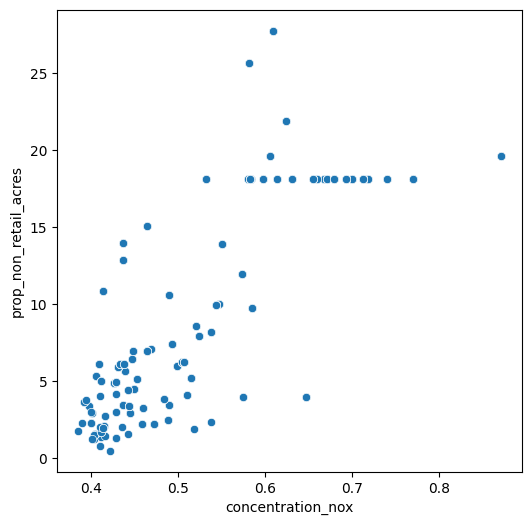

0.7636514469209151

In [29]:
# Variables: "concentration_nox", "prop_non_retail_acres" 
scatter_function("concentration_nox", "prop_non_retail_acres", datos)
pearsonr(datos["concentration_nox"], datos["prop_non_retail_acres"])[0]

This confirms a positive linear relationship between the proportion of non-retail businesses and the concentration of nitric oxides, as we saw in the correlation matrix. So this may imply that there are more factories in areas with fewer such businesses, which increases the concentration of nitric oxide due to emissions. 

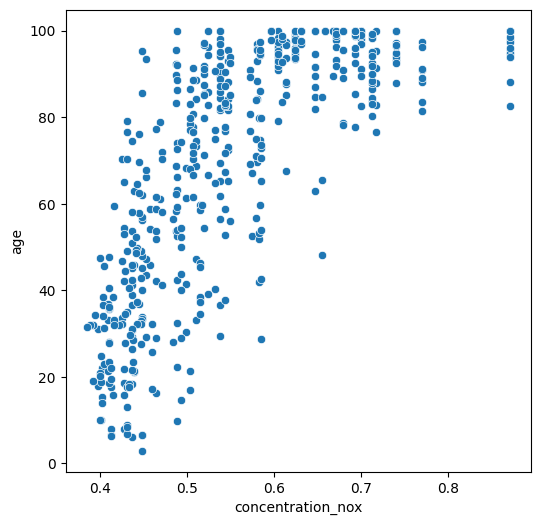

0.7314701037859584

In [30]:
# Variables: "concentration_nox", "age" 
scatter_function("concentration_nox", "age", datos)
pearsonr(datos["concentration_nox"], datos["age"])[0]

It appears that the most significant proportion of occupied units built before 1940 are located in areas with a high concentration of nitric oxides. 

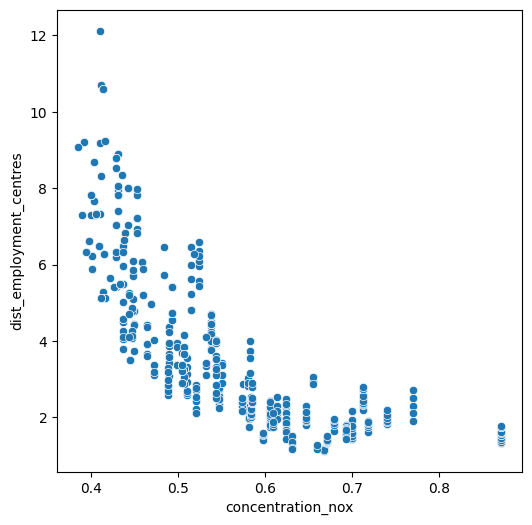

-0.7692301132258277

In [32]:
# Variables: "concentration_nox", "dist_employment_centres" 
scatter_function("concentration_nox", "dist_employment_centres", datos)
pearsonr(datos["concentration_nox"], datos["dist_employment_centres"])[0]

According to the graph, the greater the distance to employment centers, the lower the concentration level of nitric oxides.

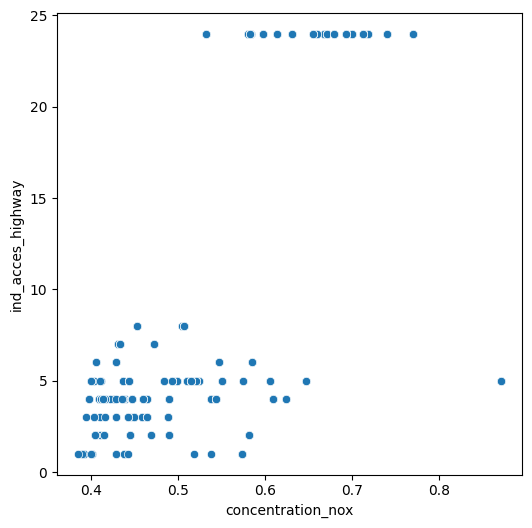

0.611440563485578

In [31]:
# Variables: "concentration_nox", "ind_acces_highway" 
scatter_function("concentration_nox", "ind_acces_highway", datos)
pearsonr(datos["concentration_nox"], datos["ind_acces_highway"])[0]

Despite the high correlation between these two variables, there is no clear relationship between them.

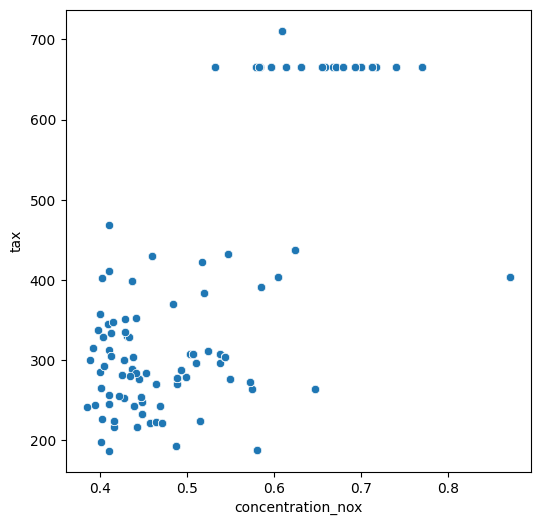

0.6680232004030221

In [33]:
# Variables: "concentration_nox", "tax" 
scatter_function("concentration_nox", "tax", datos)
pearsonr(datos["concentration_nox"], datos["tax"])[0]

In this case, happens the same thing as in the previous case; there does not seem to be a relationship between both variables; what may be generating the high correlation coefficient is the presence of extreme values.

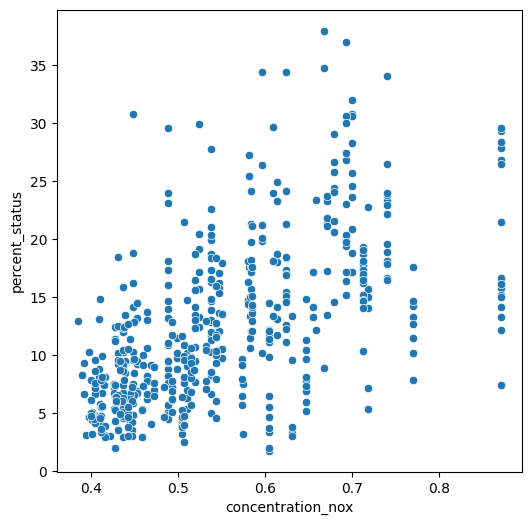

0.5908789208808461

In [34]:
# Variables: "concentration_nox", "percent_status" 
scatter_function("concentration_nox", "percent_status", datos)
pearsonr(datos["concentration_nox"], datos["percent_status"])[0]

A positive trend is observed for the concentration_nox and percent_status variables, although the relationship is not strong, and the points are widely dispersed from each other.

### Variable "avg_rooms"

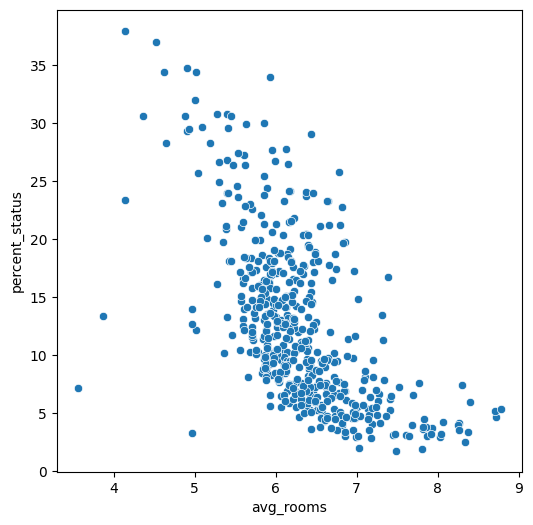

-0.6138082718663957

In [35]:
# Variables: "avg_rooms", "percent_status" 
scatter_function("avg_rooms", "percent_status", datos)
pearsonr(datos["avg_rooms"], datos["percent_status"])[0]

There is a relationship between these variables, "avg_rooms", and "percent_status". However, it does not seem linear but rather quadratic.

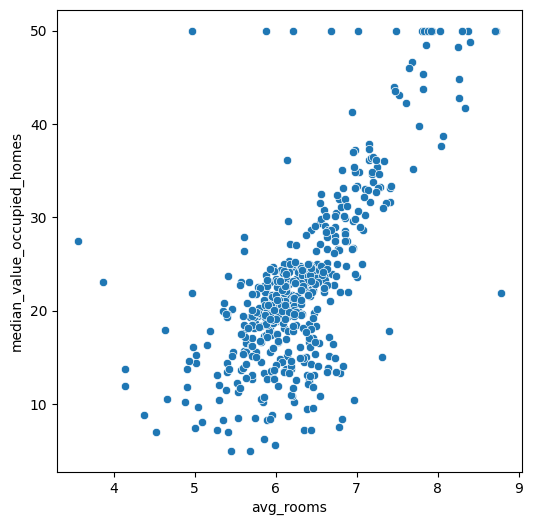

0.6953599470715394

In [36]:
# Variables: "avg_rooms", "median_value_occupied_homes" 
scatter_function("avg_rooms", "median_value_occupied_homes", datos)
pearsonr(datos["avg_rooms"], datos["median_value_occupied_homes"])[0]

The relationship between the number of rooms and the median value of the houses is clear, which makes sense since the greater the number of rooms in a home, the higher its value.

### Variable "age"

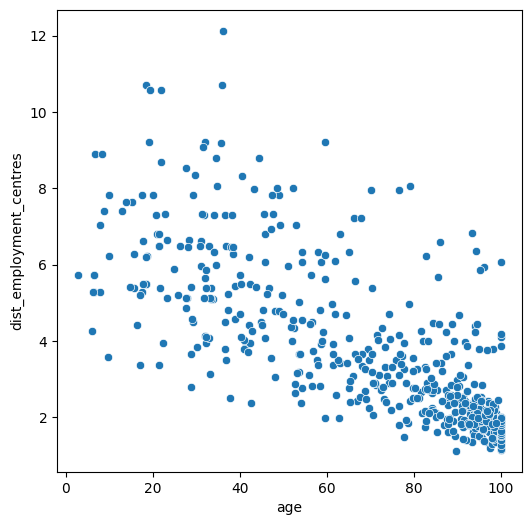

-0.7478805408686318

In [37]:
# Variables: "age", "dist_employment_centres" 
scatter_function("age", "dist_employment_centres", datos)
pearsonr(datos["age"], datos["dist_employment_centres"])[0]

The distance from houses to Boston employment centers decreases moderately as the proportion of older homes in the city increases. Boston's employment centers may be located in the city, where the ratio of units built before 1940 is comparatively high.

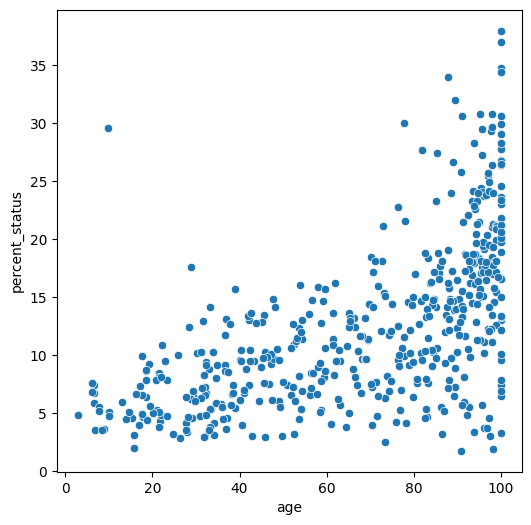

0.6023385287262398

In [38]:
# Variables: "age", "percent_status" 
scatter_function("age", "percent_status", datos)
pearsonr(datos["age"], datos["percent_status"])[0]

There seems to be a positive trend between the variables age and percent_status. However, the points become more dispersed as the value of the variables increases.

### Variable "tax"

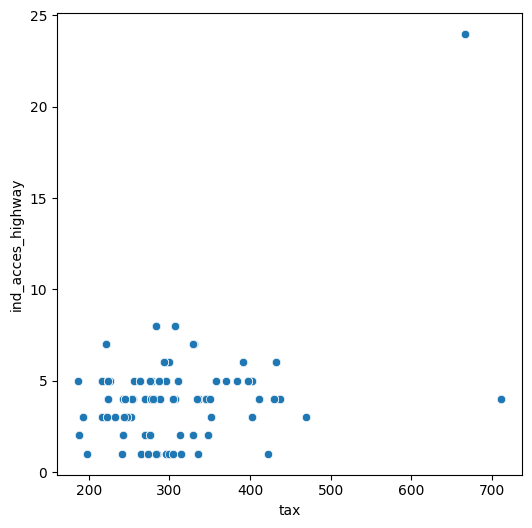

0.9102281885331868

In [39]:
# Variables: "tax", "ind_acces_highway" 
scatter_function("tax", "ind_acces_highway", datos)
pearsonr(datos["tax"], datos["ind_acces_highway"])[0]

There is no relationship between the tax and the variable ind_acces_highway. The high correlation coefficient, in this case, is due to the extreme values ​​found in both variables.

### Variable "percent_status"

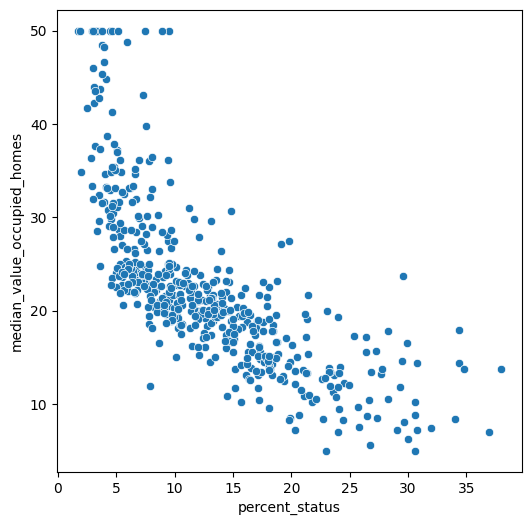

-0.737662726174015

In [40]:
# Variables: "percent_status", "median_value_occupied_homes" 
scatter_function("percent_status", "median_value_occupied_homes", datos)
pearsonr(datos["percent_status"], datos["median_value_occupied_homes"])[0]

The graph shows a negative relationship between percent_status and median_value_occupied_homes. 

##Modeling

 Since the independent variable "median_value_occupied_homes" is biased, we apply a logarithmic transformation is applied to it.

In [41]:
datos_1 = datos.copy(deep = True)
datos_1["median_value_occupied_homes"] = np.log(datos['median_value_occupied_homes'])

<Axes: xlabel='median_value_occupied_homes', ylabel='Count'>

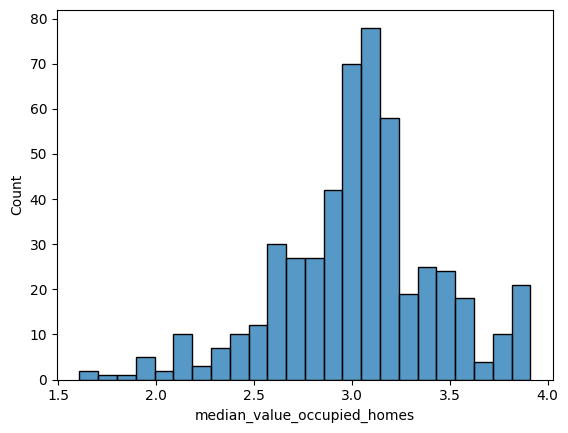

In [42]:
sns.histplot(data = datos_1, x = "median_value_occupied_homes")

 After applying the transformation, the distribution of the output variable better fits a normal distribution. 

Separating the data into the feature columns and the column with the dependent variable.

In [43]:
# Data separation
datos1_features = datos_1.drop(["median_value_occupied_homes"], axis = 1)
dependent_var_datos1 = datos_1["median_value_occupied_homes"]

**Scaling the data**


The next step in developing the model is to scale the data to avoid bias towards any variable.

In [44]:
# Using the MinMax scaler to avoid negative values ​​in the variables 
scaler_min_max = MinMaxScaler()

# Applying the scaler to the features in the data that are in the set "datos1_features" 

scaled_datos1_features = scaler_min_max.fit_transform(datos1_features)

In [46]:
# Giving a  data frame format to the scaled data: "scaled_datos1_features"

scaled_datos1_features = pd.DataFrame(scaled_datos1_features, index = datos1_features.index, columns = datos1_features.columns)
scaled_datos1_features.head()

,crime_rate,prop_zoned,prop_non_retail_acres,river_charles,concentration_nox,avg_rooms,age,dist_employment_centres,ind_acces_highway,tax,prop_teacher_student,percent_status
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.099338


In [47]:
# According to the Linear Regression model, we require a column with a constant in the "scaled_datos1_features" set to be able to calculate the model 

scaled_datos1_features = sm.add_constant(scaled_datos1_features)

Partitioning the training data for training and testing

In [48]:
# Dividing the dataframe into two sections: 70% for training and 30% for testing
# Using the scikit-learn library method for partitioning: 

from sklearn.model_selection import train_test_split

# Partitioning the set "scaled_datos1_features" and "dependent_var_datos1"

x_training, x_test, y_training, y_test = train_test_split(scaled_datos1_features, dependent_var_datos1, test_size = 0.30 , random_state = 1)

**Features analysis**

We analyze the importance of each feature to predict the dependent variable through its VIF (this value measures if the variance of the variable increases due to correlation with others). The other criterion is the p-value. 

In [49]:
# To get the VIF 

def vif_calculation(datos_vif):
  vif = []
  
  for i in range(datos_vif.shape[1]):
    vif.append(variance_inflation_factor(datos_vif.values, i))
  return(vif)

In [50]:
# VIF: original model 
vif1_coeficients1 = pd.Series(vif_calculation(x_training), index = x_training.columns, dtype = float)
print("VIF coeficients: \n\n{}\n".format(vif1_coeficients1))

VIF coeficients: 

const                      90.058919
crime_rate                  1.924114
prop_zoned                  2.743574
prop_non_retail_acres       3.999538
river_charles               1.076564
concentration_nox           4.396157
avg_rooms                   1.860950
age                         3.150170
dist_employment_centres     4.355469
ind_acces_highway           8.345247
tax                        10.191941
prop_teacher_student        1.943409
percent_status              2.861881
dtype: float64



In the initial model, VIF coefficients indicate that the variables "ind_acces_highway" and "tax" can be removed. However, we will remove "ind_acces_highway" first since its VIF is higher, then the model is recalculated 

Defining a function to perform this process faster 

In [51]:
def new_model_calculation(eliminate_feature, other_features, dependent_variable):

  # 1. Eliminating higher VIF variable 
  other_features = other_features.drop(eliminate_feature, axis = 1)
  
  # Fitting the regression model with the new data (applying ols algorithm)
  new_ols_model = sm.OLS(dependent_variable, other_features)
  
  # Fitting the model 
  new_model = new_ols_model.fit()

  # Returning the new features (those that remain after removing the high VIF variable) and the new regression model  
  return(other_features, new_model) 

### Model 2: without "ind_acces_highway" variable 

In [52]:
# Extracting the variable "ind_acces_highway": 

other_features_model2, model_2  = new_model_calculation("ind_acces_highway", x_training, y_training)

In [53]:
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_value_occupied_homes   R-squared:                       0.761
Model:                                     OLS   Adj. R-squared:                  0.753
Method:                          Least Squares   F-statistic:                     98.77
Date:                         Mon, 15 May 2023   Prob (F-statistic):           4.62e-99
Time:                                 05:59:50   Log-Likelihood:                 70.547
No. Observations:                          354   AIC:                            -117.1
Df Residuals:                              342   BIC:                            -70.66
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Now, according to the p-value of the different predictors, it is possible to eliminate the "age" variable from the model since its value is greater than the value of 0.05, and its p-value is the largest compared to others. 

### Model 3: without variable "age" 

In [54]:
# Extracting the "age" variable: 

other_features_model3, model_3  = new_model_calculation("age", other_features_model2, y_training)

In [55]:
print(model_3.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_value_occupied_homes   R-squared:                       0.761
Model:                                     OLS   Adj. R-squared:                  0.754
Method:                          Least Squares   F-statistic:                     108.9
Date:                         Mon, 15 May 2023   Prob (F-statistic):          4.40e-100
Time:                                 05:59:59   Log-Likelihood:                 70.524
No. Observations:                          354   AIC:                            -119.0
Df Residuals:                              343   BIC:                            -76.48
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

When running model 3, without the age variable and comparing the R square with the adjusted R square, the former does not change, and the adjusted one increases slightly. The following variable to eliminate is "prop_non_retail_acres" since its p-value is 0.829, which is insignificant for the model.

### Model 4: without "prop_non_retail_acres" 

In [56]:
# extracting the variable "prop_non_retail_acres":
other_features_model4, model_4  = new_model_calculation("prop_non_retail_acres", other_features_model3, y_training)

In [57]:
print(model_4.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_value_occupied_homes   R-squared:                       0.761
Model:                                     OLS   Adj. R-squared:                  0.754
Method:                          Least Squares   F-statistic:                     121.4
Date:                         Mon, 15 May 2023   Prob (F-statistic):          3.97e-101
Time:                                 06:00:07   Log-Likelihood:                 70.499
No. Observations:                          354   AIC:                            -121.0
Df Residuals:                              344   BIC:                            -82.31
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

This model, compared with the previous one, does not show changes in the measures of R square or adjusted R square, indicating that the eliminated variables were not significant predictors for the model. Therefore, we continue eliminating the "tax" variable, whose p-value is 0.189. 

##Final model selected from the elimination of features 

### Model 5: without variable "tax" 

In [58]:
# Extracting the variable "tax":
other_features_model5, model_5  = new_model_calculation("tax", other_features_model4, y_training)

In [59]:
print(model_5.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_value_occupied_homes   R-squared:                       0.759
Model:                                     OLS   Adj. R-squared:                  0.754
Method:                          Least Squares   F-statistic:                     136.1
Date:                         Mon, 15 May 2023   Prob (F-statistic):          7.78e-102
Time:                                 06:00:17   Log-Likelihood:                 69.610
No. Observations:                          354   AIC:                            -121.2
Df Residuals:                              345   BIC:                            -86.40
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

By eliminating the variables whose p-values ​​are more significant than the alpha of 0.05, we obtain a model whose coefficients are substantial except for the "prop_zoned" variable, so we proceed to eliminate it from the model. 

### Model 6: without the "prop_zoned" variable 

In [60]:
# extracting the variable "prop_zoned":
other_features_model6, model_6  = new_model_calculation("prop_zoned", other_features_model5, y_training)

In [61]:
print(model_6.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_value_occupied_homes   R-squared:                       0.757
Model:                                     OLS   Adj. R-squared:                  0.752
Method:                          Least Squares   F-statistic:                     153.9
Date:                         Mon, 15 May 2023   Prob (F-statistic):          3.21e-102
Time:                                 06:00:25   Log-Likelihood:                 67.888
No. Observations:                          354   AIC:                            -119.8
Df Residuals:                              346   BIC:                            -88.82
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

By analyzing the summary and comparing it to the previous model, the adjusted R square has decreased, this did not happen when eliminating the other variables, so this variable is eliminated from the model, and model 5 is selected as the model instead of model 6. Thus, the final fitted R-squared of the model is 0.754 

## Selected predictors

Data of the final model 

In [62]:
x_training_features  = other_features_model5
final_model= model_5

**Observations:**

A total of 4 variables were eliminated:

1. ind_access_highway"
2.age
3.prop_acre_non_retail
4. tax

Which leaves 8 predictor variables in the model.

## **Validation of assumptions**

1. Assumption of No Autocorrelation 

In [63]:
#  Durbin-Watson test to determine if there is autocorrelation 

from statsmodels.stats.stattools import durbin_watson as dwtest

residuals = final_model.resid
residuals_array = np.array(residuals)
round(dwtest(residuals),2)

1.97


Since the Durbin-Watson value is practically equal to 2, it can be assumed that the assumption of no autocorrelation between the residuals is fulfilled.  

2. Assumption of normality

In this case, we can plot a histogram of the residuals to determine if they follow a normal distribution. 

<Axes: ylabel='Count'>

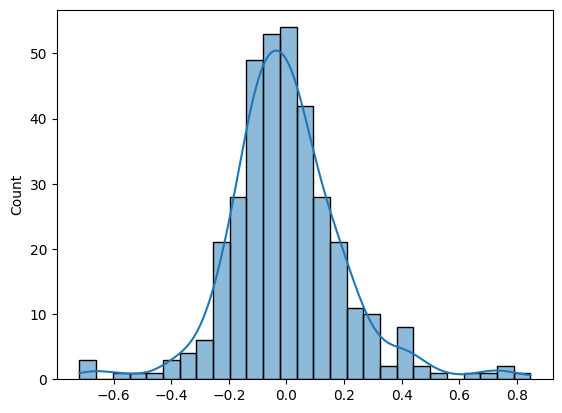

In [64]:
sns.histplot(residuals, kde = True)

3. Assumption of homoscedasticity 

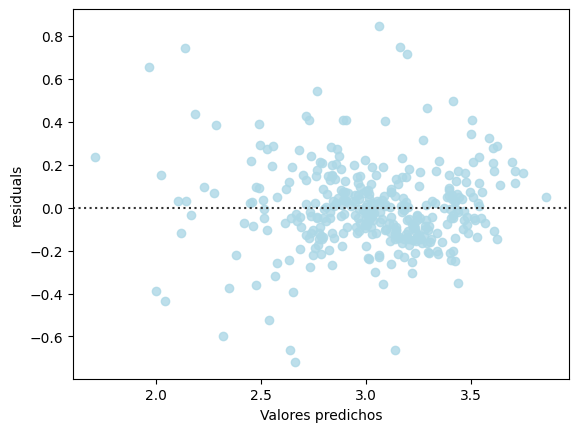

In [65]:
# Plot the residuals against the predicted values 

# Get the predicted values ​​of the model we are working with 
predicted_values = final_model.fittedvalues 

# Plot 
sns.residplot(x = predicted_values, y = residuals, color = "lightblue")
plt.xlabel("Valores predichos")
plt.ylabel("residuals")
plt.show()


In this case, there does not seem to be a pattern indicating that the variance of the residuals depends on x, so it can be assumed that the residuals meet the homoscedasticity assumption. 

4. Assumption of linearity



Based on what is observed in the graph of residuals versus predicted, it can be assumed that the relationship between these complies with the assumption of linearity. 

5. No multicollinearity

In [66]:
# Calculating the VIF coefficient again for the model 

vif_coeficients = pd.Series(vif_calculation(x_training_features), index = x_training_features.columns, dtype = float)
print("VIF coeficients: \n\n{}\n".format(vif_coeficients))

VIF coeficients: 

const                      76.112440
crime_rate                  1.485460
prop_zoned                  2.416945
river_charles               1.049498
concentration_nox           2.895969
avg_rooms                   1.714308
dist_employment_centres     3.721739
prop_teacher_student        1.447584
percent_status              2.439282
dtype: float64



The VIF values ​​for the features are all less than 4, so we can assume that the non-multicollinearity assumption is fulfilled. 

## Model evaluation

Then, we review the R squared and the adjusted R squared of the final model we are working with.  

In [67]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_value_occupied_homes   R-squared:                       0.759
Model:                                     OLS   Adj. R-squared:                  0.754
Method:                          Least Squares   F-statistic:                     136.1
Date:                         Mon, 15 May 2023   Prob (F-statistic):          7.78e-102
Time:                                 06:01:03   Log-Likelihood:                 69.610
No. Observations:                          354   AIC:                            -121.2
Df Residuals:                              345   BIC:                            -86.40
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.6533      0.093     39.129      0.000       3.470       3.837
crime_rate                 -0.8699      0.136     -6.381      0.000      -1.138      -0.602
prop_zoned                  0.1300      0.071      1.837      0.067      -0.009       0.269
river_charles               0.1219      0.039      3.096      0.002       0.044       0.199
concentration_nox          -0.3823      0.075     -5.090      0.000      -0.530      -0.235
avg_rooms                   0.3625      0.106      3.429      0.001       0.155       0.570
dist_employment_centres    -0.5676      0.106     -5.336      0.000      -0.777      -0.358
prop_teacher_student       -0.3196      0.056     -5.661      0.000      -0.431      -0.209
percent_status             -1.0625      0.083    -12.749      0.000      -1.226      -0.899
==============================================================================
Omnibus:                       44.330   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.464
Skew:                           0.509   Prob(JB):                     9.52e-33
Kurtosis:                       5.993   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The resulting model has a very similar R-squared and adjusted R-squared, which indicates that the R-squared is not being inflated by predictors that do not help explain the variability of the model and features that had high predictive power. In this regard, the model manages to explain 75.4% of it. 

Final data for testing 

In [68]:
# Generating a dataframe, from the test data, with the predictor columns 
x_test_features = x_test.filter(["const","crime_rate", "prop_zoned", "river_charles", "concentration_nox", 
                                             "avg_rooms", "dist_employment_centres", "prop_teacher_student","percent_status"], axis=1).copy()
x_test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 307 to 23
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    152 non-null    float64
 1   crime_rate               152 non-null    float64
 2   prop_zoned               152 non-null    float64
 3   river_charles            152 non-null    float64
 4   concentration_nox        152 non-null    float64
 5   avg_rooms                152 non-null    float64
 6   dist_employment_centres  152 non-null    float64
 7   prop_teacher_student     152 non-null    float64
 8   percent_status           152 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [70]:
x_training_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 13 to 37
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    354 non-null    float64
 1   crime_rate               354 non-null    float64
 2   prop_zoned               354 non-null    float64
 3   river_charles            354 non-null    float64
 4   concentration_nox        354 non-null    float64
 5   avg_rooms                354 non-null    float64
 6   dist_employment_centres  354 non-null    float64
 7   prop_teacher_student     354 non-null    float64
 8   percent_status           354 non-null    float64
dtypes: float64(9)
memory usage: 27.7 KB


## Predictions on test data


When making the predictions on the test data, we measure how good it is through the calculation of different error measures. 

In [71]:
# Function to calculate the RMSE
def function_rmse(observed, predictions):
    return np.sqrt(((observed - predictions)**2).mean())

In [72]:
# Function to calculate MAPE
def function_mape(observed, predictions):
    return np.mean(np.abs((observed - predictions)) / observed) * 100

In [73]:
# Function to calculate the MAE
def function_mae(observed, predictions):
    return np.mean(np.abs((observed - predictions)))

In [74]:
def model_prediction(modelo, x):
# prediction on the data of the provided features
    predicted_y = modelo.predict(x)
    #y_training
    return(predicted_y)

In [75]:
# RMSE error 
rmse_training = round(function_rmse(y_training, model_prediction(final_model, x_training_features)),2)
rmse_test = round(function_rmse(y_test, model_prediction(final_model, x_test_features)),2)

In [76]:
#Error MAPE
mape_training = round(function_mape(y_training, model_prediction(final_model, x_training_features)),2)
mape_test = round(function_mape(y_test, model_prediction(final_model, x_test_features)),2)

In [77]:
#Error MAE
mae_entrenamiento = round(function_mae(y_training, model_prediction(final_model, x_training_features)),2)
mae_prueba = round(function_mae(y_test, model_prediction(final_model, x_test_features)),2)

In [80]:
print(pd.DataFrame({"Data": ["Training", "Proof"],"RMSE": [rmse_training, rmse_test], "MAPE": [mape_training, mape_test], "MAE": [mae_entrenamiento, mae_prueba]}))

       Data  RMSE  MAPE   MAE
0  Training  0.20  4.93  0.14
1     Proof  0.19  4.99  0.14


From the parameters to measure the error, according to the MAPE, the model's predictions are 4.93% out of phase with the actual values ​​for the training set and 4.99% for the test set. Therefore we can expect that the model's behavior with the real data does not vary much from the one observed in these data, offering predictions close to reality. The RMSE reinforces this, indicating that, on average, the distance of the predicted data concerning the real data is 0.20 for the training data and 0.19 for the test data. 

Now, the model equation is: 

**log(median_value_occupied_homes)** = 3.65 - 0.87 * **crime_rate** + 0.13 * **prop_zoned** + 0.12 * **river_charles** - 0.38 * **concentration_nox** + 0.36 * **avg_rooms** - 0.57 * **dist_employment_centres** - 0.32 * **prop_teacher_student** - 1.06 **percent_status**

From the equation: most of the predictor variables have a decreasing effect on the logarithm of the average value of the houses. The variables that cause this effect are: 

1. Crime rate (crime_rate)
2. The concentration of nitric oxides: (concentration_nox)
3. The weighted distance to 5 employment centers (dis_employment_centres)
4. The student-teacher ratio (prop_teacher_student)
5. The percentage of the population of a lower status (percent_status)

Of these five variables, "percent_status" generates the most significant decrease. If we remember from the bivariate analysis section, when plotting the relationship between the two, there was a strong negative correlation between them. 

On the other hand, the variables whose effect increases the logarithm of the dependent variable are only 3, in addition to the constant:

1. The proportion of residential area zoned for lots larger than 25,000 square feet (prop_zoned)

2. The proximity to the Charles River.

3. The average number of rooms (avg_rooms)

Although these variables are positive, it is necessary to consider that their coefficient is less than 1, so they reduce the variable to which they multiply.


So, to increase the expected price for a house in this area, it must be located in a new residential area with ample spaces to build residences. The greater the number of rooms, the better the price, and its closeness to the Charles River also helps raise it.